# Assignment 7: Linear Model Selection and Regularization

Dataset(s) needed:
Kaggle House Prices (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [2]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Drop the Id columns from both train and test as these are not needed for prediction

In [5]:
train = train.drop('Id',axis=1)
test = test.drop('Id',axis=1)

#### Visualize a scatter plot of 'GrLivArea' in the x-axis and 'SalePrice' in the y-axis. Can you spot any outliers?

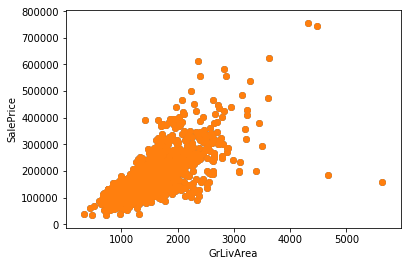

In [9]:
import matplotlib.pyplot as plt

x = train['GrLivArea']
y = train['SalePrice']

plt.scatter(x,y)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

# There appears to be a handful of outliers at x values higher than ~4000. Only about four though.

#### Remove outliers in the data for all GrLivArea greater than 4000 then check the scatter plot again

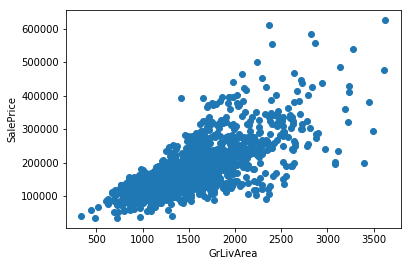

In [11]:
# Remove outliers for train['GrLivArea']>4000
train = train[train['GrLivArea']<4000]

x = train['GrLivArea']
y = train['SalePrice']

plt.scatter(x,y)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

#### Convert categorical variable into dummy variables using pandas get_dummies API


In [14]:
train = pd.get_dummies(train)

#### Impute missing data by the mean of each column.

In [28]:
train = train.fillna(train.mean())

Generate train test split 70/30

In [30]:
from sklearn.model_selection import train_test_split

target =  'SalePrice'
features = list(train.drop(target,axis=1).columns.values)

X = train[features]
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Linear Regression

In [39]:
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from numpy import sqrt

#Fit a linear regression model to this data
lr = LinearRegression()
lr = lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

lr_mse = mean_squared_error(y_test,y_preds)
lr_rmse = sqrt(lr_mse)

#Compute the RMSE 
print("RMSE:",lr_rmse.round(2))

RMSE: 23239.53


## Lasso Regression

#### Fit lasso regression to training data with alpha 20. (Bonus: You could try CV to find the best alpha within a range)

In [ ]:
from sklearn import linear_model

#TODO: fit a Lasso regression model to this data

#Compute the RMSE 
#TODO

#### How many columns has the model chosen?

In [ ]:
#TODO

## Ridge Regression

#### Perform ridge regression with alpha set to 0.1 and normalize to True. (Bonus: You could try CV to find the best alpha within a range). 

In [ ]:
#TODO

#### What is your root mean squared error (RMSE)? Comment on your observation.

In [ ]:
#Compute the RMSE 
#TODO

## Elastic Net Regression

#### Perform elastic net regression with different values of alpha (0.01, 0.1 and 20). Compute the RMSE as well. 


In [ ]:
#TODO: fit the Elastic net regression model to this data

#TODO: Compute the RMSE